# Recreating Zwift ride powerplot

## Step 1:  Import .fit file and convert to pandas dataframe

The code below is from http://johannesjacob.com/analyze-your-cycling-data-python/.
To install the python packages, type 'pip install pandas numpy fitparse matplotlib tqdm' on the command line.


In [1]:
import os
import datetime
from fitparse import FitFile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


In [2]:
filename = input("Type filename, including .fit extension:  ")
# 2021-10-05-10-54-32.fit

fitfile = FitFile(filename)

Type filename, including .fit extension:  2021-10-05-10-54-32.fit


From the blog post:  
"Now we are ready to import the workout file and transform the data into a 
pandas dataframe. Unfortunately we have to use an ugly hack with this "while" 
loop to avoid timing issues. Then we are looping through the file, append 
the records to a list and convert the list to a pandas dataframe."

In [3]:
while True:
    try:
        fitfile.messages
        break
    except KeyError:
        continue
workout = []
for record in fitfile.get_messages('record'):
    r = {}
    for record_data in record:
        r[record_data.name] = record_data.value
    workout.append(r)
df = pd.DataFrame(workout)

In [4]:
df.head()

,altitude,cadence,compressed_speed_distance,cycle_length,distance,enhanced_altitude,enhanced_speed,grade,heart_rate,position_lat,position_long,power,resistance,speed,temperature,time_from_course,timestamp
0,5.0,108,None,None,None,5.0,9.948,None,165,-138819701,1991832102,280,None,9.948,None,None,2021-10-05 18:05:18
1,5.0,109,None,None,None,5.0,10.150,None,166,-138820063,1991831076,248,None,10.150,None,None,2021-10-05 18:05:19
2,5.0,110,None,None,None,5.0,10.311,None,167,-138820372,1991830018,245,None,10.311,None,None,2021-10-05 18:05:20
3,5.0,108,None,None,None,5.0,10.464,None,168,-138820865,1991828979,248,None,10.464,None,None,2021-10-05 18:05:21
4,4.8,107,None,None,None,4.8,10.771,None,168,-138821057,1991827881,234,None,10.771,None,None,2021-10-05 18:05:22


In [5]:
df.tail(1)

,altitude,cadence,compressed_speed_distance,cycle_length,distance,enhanced_altitude,enhanced_speed,grade,heart_rate,position_lat,position_long,power,resistance,speed,temperature,time_from_course,timestamp
4675,-5.4,0,None,None,None,-5.4,0.0,None,141,-138956888,1991928421,0,None,0.0,None,None,2021-10-05 19:23:13


In [6]:
timestamp = df['timestamp'].tail(1).values
timestamp

array(['2021-10-05T19:23:13.000000000'], dtype='datetime64[ns]')

In [7]:
type(timestamp)

numpy.ndarray

In [8]:
print(timestamp)

['2021-10-05T19:23:13.000000000']


In [9]:
date = np.datetime_as_string(timestamp, unit='D')
date

array(['2021-10-05'], dtype='<U28')

In [10]:
date_str = str(date)
type(date_str)
print(date_str)


['2021-10-05']


In [11]:
date_str = date_str.strip("[")
date_str = date_str.strip("]")
date_str = date_str.strip("'")
print(date_str)

2021-10-05


In [12]:
df.columns

Index(['altitude', 'cadence', 'compressed_speed_distance', 'cycle_length',
       'distance', 'enhanced_altitude', 'enhanced_speed', 'grade',
       'heart_rate', 'position_lat', 'position_long', 'power', 'resistance',
       'speed', 'temperature', 'time_from_course', 'timestamp'],
      dtype='object')

I'd like to keep the following columns only:
* cadence
* heart_rate
* power
* speed


In [13]:
df_subset = pd.DataFrame(df, columns=['cadence', 'heart_rate', 'power', 'speed'])
df_subset

,cadence,heart_rate,power,speed
0,108,165,280,9.948
1,109,166,248,10.150
2,110,167,245,10.311
3,108,168,248,10.464
4,107,168,234,10.771
...,...,...,...,...
4671,0,143,0,1.061
4672,0,142,0,0.330
4673,0,142,0,0.000
4674,0,141,0,0.000


In [14]:
df_subset.insert(loc=0, column='time_seconds', value=np.arange(len(df_subset)))

In [15]:
df_subset

,time_seconds,cadence,heart_rate,power,speed
0,0,108,165,280,9.948
1,1,109,166,248,10.150
2,2,110,167,245,10.311
3,3,108,168,248,10.464
4,4,107,168,234,10.771
...,...,...,...,...,...
4671,4671,0,143,0,1.061
4672,4672,0,142,0,0.330
4673,4673,0,142,0,0.000
4674,4674,0,141,0,0.000


In [16]:
df_subset.rename(columns = {'power':'watts'}, inplace = True)

In [17]:
df_subset

,time_seconds,cadence,heart_rate,watts,speed
0,0,108,165,280,9.948
1,1,109,166,248,10.150
2,2,110,167,245,10.311
3,3,108,168,248,10.464
4,4,107,168,234,10.771
...,...,...,...,...,...
4671,4671,0,143,0,1.061
4672,4672,0,142,0,0.330
4673,4673,0,142,0,0.000
4674,4674,0,141,0,0.000


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from smooth import smooth

In [19]:
# Enter FTP

ftp = int(input("Enter FTP in watts (numbers only):  "))

# ftp = 118

Enter FTP in watts (numbers only):  118


In [20]:
watts = df_subset['watts']
time = df_subset['time_seconds']

In [21]:
print(len(watts))
watts

4676


0       280
1       248
2       245
3       248
4       234
       ... 
4671      0
4672      0
4673      0
4674      0
4675      0
Name: watts, Length: 4676, dtype: int64

In [22]:
max_watts = max(watts)
max_watts

294

In [23]:
y_top = max(watts)*1.20
y_top

352.8

In [24]:
print(len(time))
time

4676


0          0
1          1
2          2
3          3
4          4
        ... 
4671    4671
4672    4672
4673    4673
4674    4674
4675    4675
Name: time_seconds, Length: 4676, dtype: int64

In [25]:
# convert to numpy array

workout_data = df_subset.to_records(index=False)

In [26]:
workout_data

rec.array([(   0, 108, 165, 280,  9.948), (   1, 109, 166, 248, 10.15 ),
           (   2, 110, 167, 245, 10.311), ...,
           (4673,   0, 142,   0,  0.   ), (4674,   0, 141,   0,  0.   ),
           (4675,   0, 141,   0,  0.   )],
          dtype=[('time_seconds', '<i8'), ('cadence', '<i8'), ('heart_rate', '<i8'), ('watts', '<i8'), ('speed', '<f8')])

In [27]:
watts = workout_data['watts']
time = workout_data['time_seconds']

In [28]:
watts

array([280, 248, 245, ...,   0,   0,   0])

In [29]:
time

array([   0,    1,    2, ..., 4673, 4674, 4675])

In [30]:
watts_smoothed = smooth(watts, window_len=25)
print(len(watts_smoothed))
watts_smoothed

4676


array([2.74581852e+02, 2.63853559e+02, 2.53436234e+02, ...,
       2.45651647e-01, 4.11729599e-02, 0.00000000e+00])

In [31]:
# converting seconds into minutes

minutes = workout_data['time_seconds']/60
minutes

array([0.00000000e+00, 1.66666667e-02, 3.33333333e-02, ...,
       7.78833333e+01, 7.79000000e+01, 7.79166667e+01])

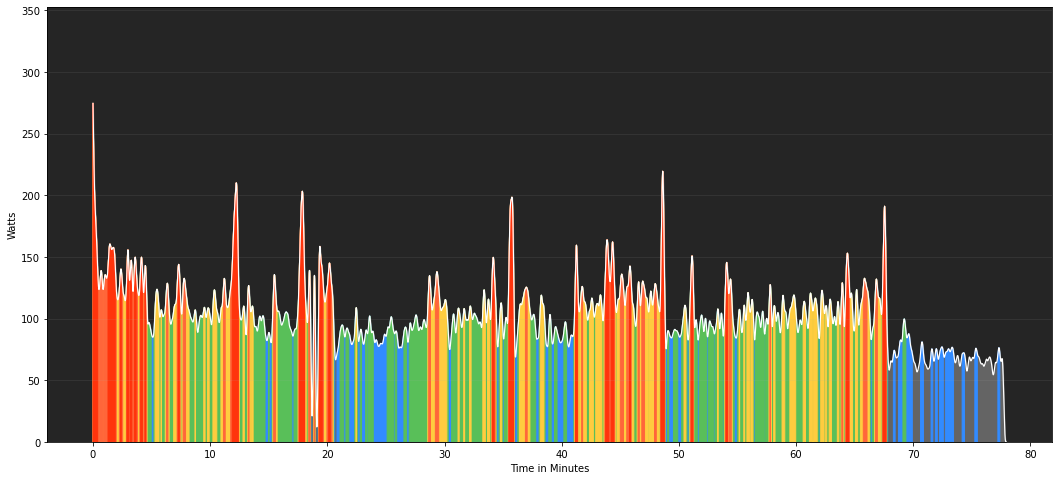

In [72]:
# find color codes at https://rgbacolorpicker.com/hex-color-picker

fig, ax = plt.subplots(figsize=(18, 8))
ax.set_facecolor(color='#252525')
ax.set_xlabel("Time in Minutes")
ax.set_ylabel("Watts")
ax.set_ylim(top=y_top)
ax.grid(which='major', axis='y', alpha=0.1, linewidth=1)
plt.fill_between(minutes, watts_smoothed, where=watts_smoothed > 0.00*ftp, color='#646464')
plt.fill_between(minutes, watts_smoothed, where=watts_smoothed > 0.60*ftp, color='#328bff')
plt.fill_between(minutes, watts_smoothed, where=watts_smoothed > 0.75*ftp, color='#59bf59')
plt.fill_between(minutes, watts_smoothed, where=watts_smoothed > 0.90*ftp, color='#ffcc3f')
plt.fill_between(minutes, watts_smoothed, where=watts_smoothed > 1.05*ftp, color='#ff663a')
plt.fill_between(minutes, watts_smoothed, where=watts_smoothed > 1.18*ftp, color='#ff340c')
# TSS_guy = plt.imread('TSS_guy.png') # insert local path of the image.
# plt.imshow(TSS_guy)
# plt.axis('off')

plt.plot(minutes, watts_smoothed, color='white', linewidth=1.2)
plt.show();

In [32]:
import matplotlib.image as mpimg

img = mpimg.imread('my_memoji.png')


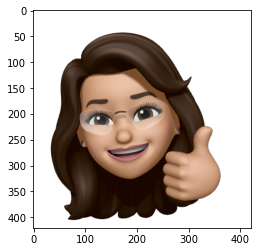

In [33]:
imgplot = plt.imshow(img)

In [34]:
print(date_str)

2021-10-05


In [35]:
name = input("Your name? ")
name

Your name? Gina D


'Gina D'

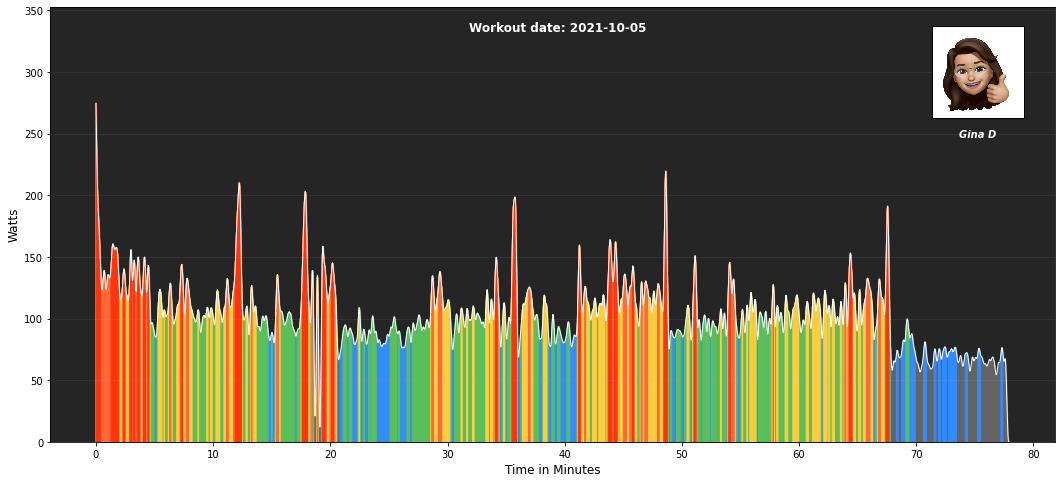

In [54]:
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)

from matplotlib.text import Annotation

img, ax = plt.subplots(figsize=(18, 8))
ax.set_facecolor(color='#252525')
ax.set_xlabel("Time in Minutes", fontsize='large')
ax.set_ylabel("Watts", fontsize='large')

# This expands the top of the graph to 20% beyond max watts
ax.set_ylim(top=y_top)

# logic for color under the graph based on % of FTP (thanks to Jonas Häggqvist for this code)
ax.grid(which='major', axis='y', alpha=0.1, linewidth=1)
plt.fill_between(minutes, watts_smoothed, where=watts_smoothed > 0.00*ftp, color='#646464')
plt.fill_between(minutes, watts_smoothed, where=watts_smoothed > 0.60*ftp, color='#328bff')
plt.fill_between(minutes, watts_smoothed, where=watts_smoothed > 0.75*ftp, color='#59bf59')
plt.fill_between(minutes, watts_smoothed, where=watts_smoothed > 0.90*ftp, color='#ffcc3f')
plt.fill_between(minutes, watts_smoothed, where=watts_smoothed > 1.05*ftp, color='#ff663a')
plt.fill_between(minutes, watts_smoothed, where=watts_smoothed > 1.18*ftp, color='#ff340c')

# Setting the image and location (thanks to Phil Daws for the code that helped me get started)
img = plt.imread("my_memoji.png", format=None)
imagebox = OffsetImage(img, zoom=0.2)
imagebox.image.axes = ax

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

xy = [xmax-(xmax*0.08), ymax-(ymax*0.15)]

ab = AnnotationBbox(imagebox, xy,frameon=True)
ax.add_artist(ab)

# Adding name under image
img_name = Annotation(name, xy=[xmax-(xmax*0.1), ymax-(ymax*0.3)], color='white', 
                  fontweight='bold', fontsize='medium', fontstyle='italic')
ax.add_artist(img_name)

# Adding the workout date to the graph
workout_date = Annotation(f'Workout date: {date_str}', xy=[xmax-50, ymax-20], color='white', 
                          fontweight='bold', fontsize='large')
ax.add_artist(workout_date)

# Setting plot line color and thickness
plt.plot(minutes, watts_smoothed, color='white', linewidth=1.0)

plt.show()